In [132]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from hol.count_wpm import CountWPM
from hol.anchored_count_wpm import AnchoredCountWPM

year1 = 1750
year2 = 1920

wpm0 = CountWPM(year1, year2)
wpm1 = AnchoredCountWPM(year1, year2)

### Raw WPM series

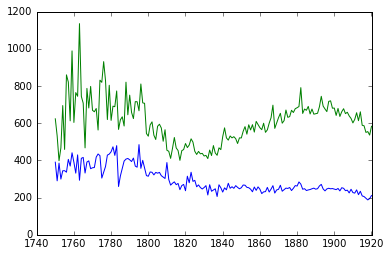

In [2]:
series = wpm0.series('art')
plt.plot(*zip(*series.items()))

series = wpm1.series('art')
plt.plot(*zip(*series.items()))

### Smoothed WPM series

-0.10404915293 0.175634775843


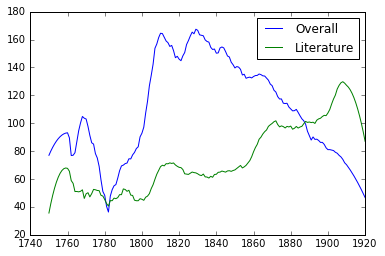

In [127]:
from collections import OrderedDict
from scipy.stats import pearsonr

def plot_token(token):

    s1 = wpm0.series_smooth(token)
    plt.plot(*zip(*s1.items()), label='Overall')

    s2 = wpm1.series_smooth(token)
    plt.plot(*zip(*s2.items()), label='Literature')
    
    plt.legend(loc='upper right')
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    corr, p = pearsonr(vals1, vals2)
    print(corr, p)
    
plot_token('jesus')

### Distinctive words, 20-year buckets

In [111]:
from hol.models import AnchoredCount

buckets = [
    (1740, 1760),
    (1760, 1780),
    (1780, 1800),
    (1820, 1840),
    (1840, 1860),
    (1860, 1880),
    (1880, 1900),
    (1900, 1920),
]

tokens = set()

for y1, y2 in buckets:
    mdws = AnchoredCount.mdw(y1, y2)
    tokens.update(list(mdws.keys())[:500])

### Divide analysis WPMs by reference WPMs

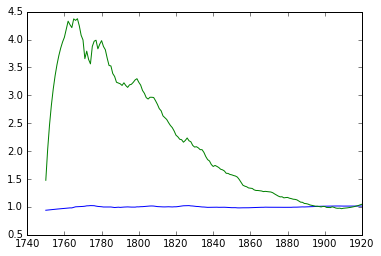

In [192]:
import numpy as np

ratios = {}
for token in tokens:
    
    s1 = wpm0.series_smooth(token)
    s2 = wpm1.series_smooth(token)
    
    s1_resized = OrderedDict([
        (year, s1[year])
        for year in s2.keys()
    ])
    
    vals1 = list(s1_resized.values())
    vals2 = list(s2.values())
    
    r = np.array(vals2) / np.array(vals1)
    ratios[token] = OrderedDict(zip(s2.keys(), r))
    

plt.plot(*zip(*deltas['the'].items()))
plt.plot(*zip(*deltas['specimen'].items()))

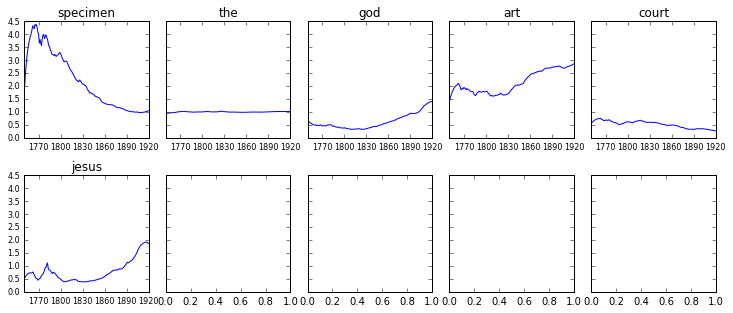

In [204]:
from hol.utils import sort_dict

def print_ratios(tokens, cols=5):
    
    # Get row count and figure size.
    rows = math.ceil(len(tokens) / cols)
    figsize = (cols*2, rows*2)
    
    # Make the figure + axes.
    fig, axarr = plt.subplots(rows, cols, figsize=figsize, sharey=True)
    fig.tight_layout(pad=0, h_pad=2, w_pad=0.1)
    
    for i, token in enumerate(tokens):
        
        ax = axarr[math.floor(i/cols)][i%cols]
        ax.set_title(token)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax.tick_params(labelsize=8)
        ax.set_xlim(year1, year2)
        
        series = ratios[token]
        ax.plot(*zip(*series.items()))
        
print_ratios(['specimen', 'the', 'god', 'art', 'court', 'jesus'])